In [20]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
import tensorflow as tf
import seaborn as sns
import pandas as pd
import matplotlib.pyplot  as plt

%matplotlib inline

Загрузка датасета

In [21]:
df = pd.read_csv('monthly-car-sales.csv')

Описание

In [22]:
df.head()

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [24]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587


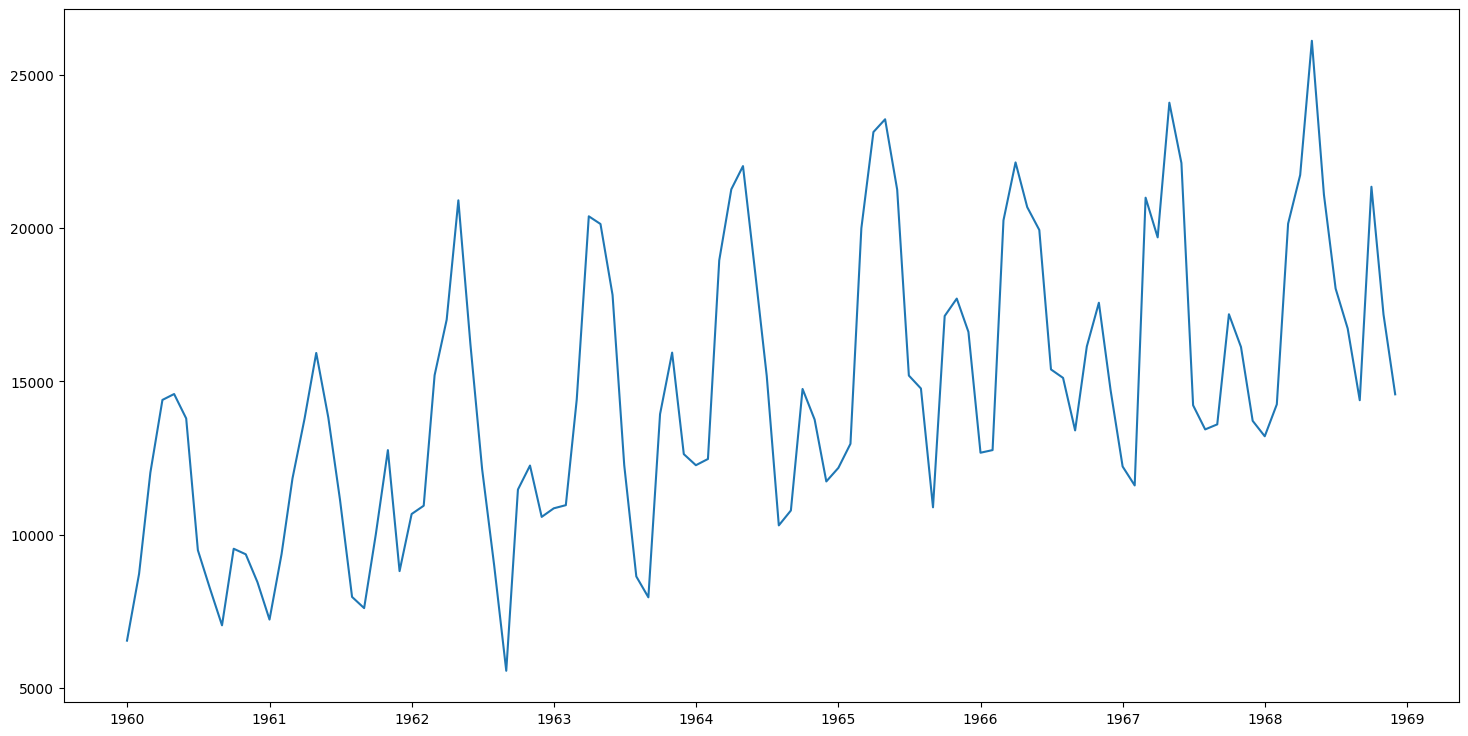

In [25]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Sales"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

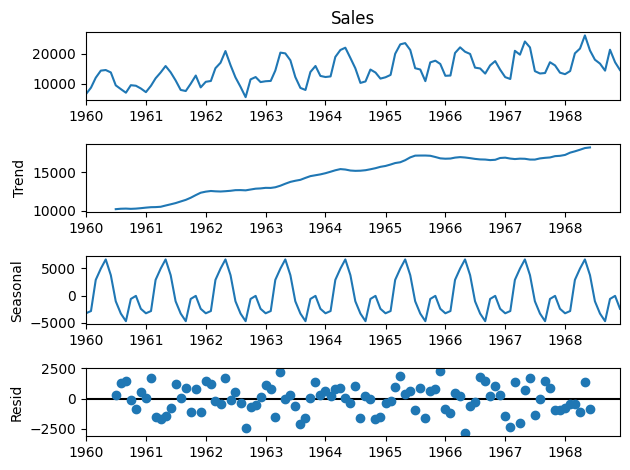

In [26]:
a = seasonal_decompose(df["Sales"], model = "add")
a.plot();

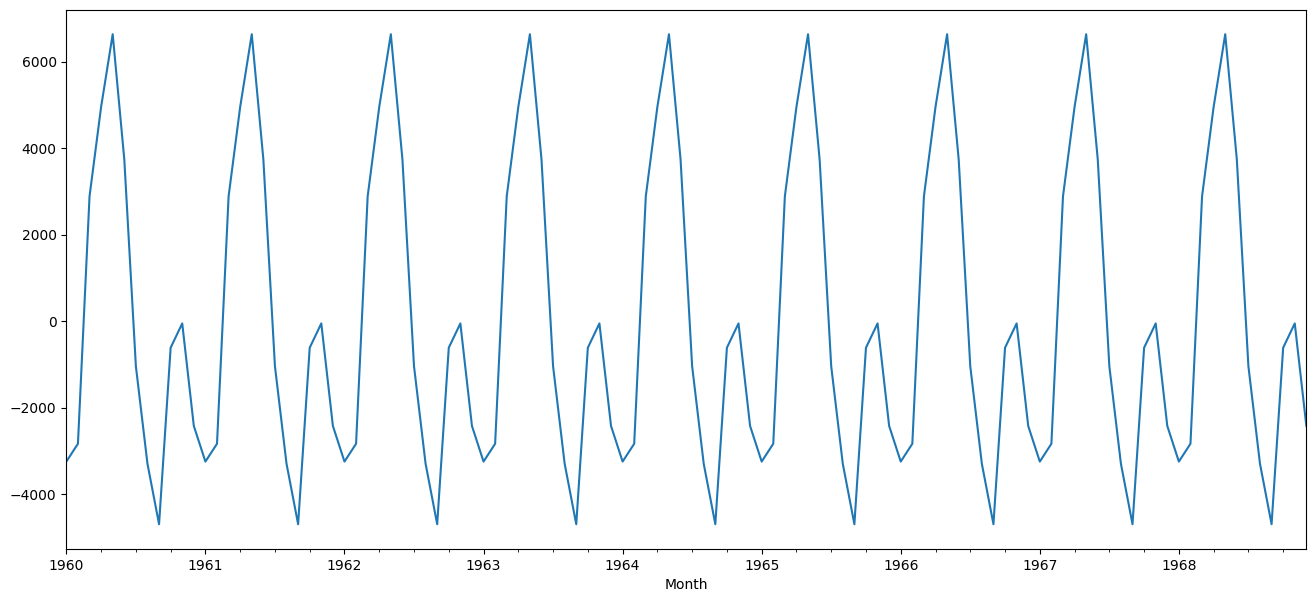

In [27]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

p-value

In [28]:
adf_test = adfuller(df["Sales"])
print('p-value = ' + str(adf_test[1]))

if adf_test[1] > 0.05:
    print('it is not a stationary process')
else:
    print('it is a stationary process')

p-value = 0.6632691049832866
it is not a stationary process


ARIMA

In [29]:
train_data = df[:len(df)-12]
print(train_data)
test_data = df[len(df)-12:]

            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587
...           ...
1967-08-01  13434
1967-09-01  13598
1967-10-01  17187
1967-11-01  16119
1967-12-01  13713

[96 rows x 1 columns]


In [30]:
arima_model = SARIMAX(train_data['Sales'], order = (2,1,1), seasonal_order = (4,0,3,12))
#arima_model = ARIMA(train_data['Sales'], order=(5,1,0))
arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.42371D+00    |proj g|=  8.66525D-01


 This problem is unconstrained.



At iterate    5    f=  9.04924D+00    |proj g|=  3.12789D-02

At iterate   10    f=  9.04301D+00    |proj g|=  2.66076D-02

At iterate   15    f=  9.02925D+00    |proj g|=  1.65731D-02

At iterate   20    f=  9.01769D+00    |proj g|=  5.85355D-03

At iterate   25    f=  9.01757D+00    |proj g|=  6.16539D-04

At iterate   30    f=  9.01755D+00    |proj g|=  2.23847D-04

At iterate   35    f=  9.01754D+00    |proj g|=  1.22783D-03

At iterate   40    f=  9.01720D+00    |proj g|=  5.93794D-03

At iterate   45    f=  9.01589D+00    |proj g|=  6.38649D-03

At iterate   50    f=  9.01506D+00    |proj g|=  2.36873D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                      Sales   No. Observations:                   96
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood                -865.445
Date:                                    Wed, 17 May 2023   AIC                           1752.891
Time:                                            04:35:46   BIC                           1780.983
Sample:                                        01-01-1960   HQIC                          1764.242
                                             - 12-01-1967                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4946      0.310      1.596      0.111      -0.113       1.102
ar.L2         -0.0191      0.414     -0.046      0.963      -0.831       0.793
ma.L1         -0.9322      0.115     -8.094      0.000      -1.158      -0.706
ar.S.L12      -1.0810     24.697     -0.044      0.965     -49.486      47.324
ar.S.L24       0.2150      7.449      0.029      0.977     -14.384      14.814
ar.S.L36       0.8563     11.255      0.076      0.939     -21.204      22.917
ar.S.L48       0.2890     10.309      0.028      0.978     -19.916      20.494
ma.S.L12       1.5403     24.867      0.062      0.951     -47.198      50.278
ma.S.L24       0.7773     18.887      0.041      0.967     -36.241      37.796
ma.S.L36       0.0437      5.475      0.008      0.994     -10.686      10.774
sigma2       8.09e+06      0.001   1.22e+10      0.000    8.09e+06    8.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.90   Prob(JB):                         0.49
Heteroskedasticity (H):               0.74   Skew:                             0.22
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.49e+25. Standard errors may be unstable.
"""

In [31]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1968-01-01    12437.592218
1968-02-01    12747.005207
1968-03-01    19521.571206
1968-04-01    20100.873162
1968-05-01    21486.297581
1968-06-01    20565.534053
1968-07-01    15079.413175
1968-08-01    14977.806920
1968-09-01    14205.955763
1968-10-01    17110.169610
1968-11-01    17399.104944
1968-12-01    15433.965823
Freq: MS, Name: ARIMA Predictions, dtype: float64

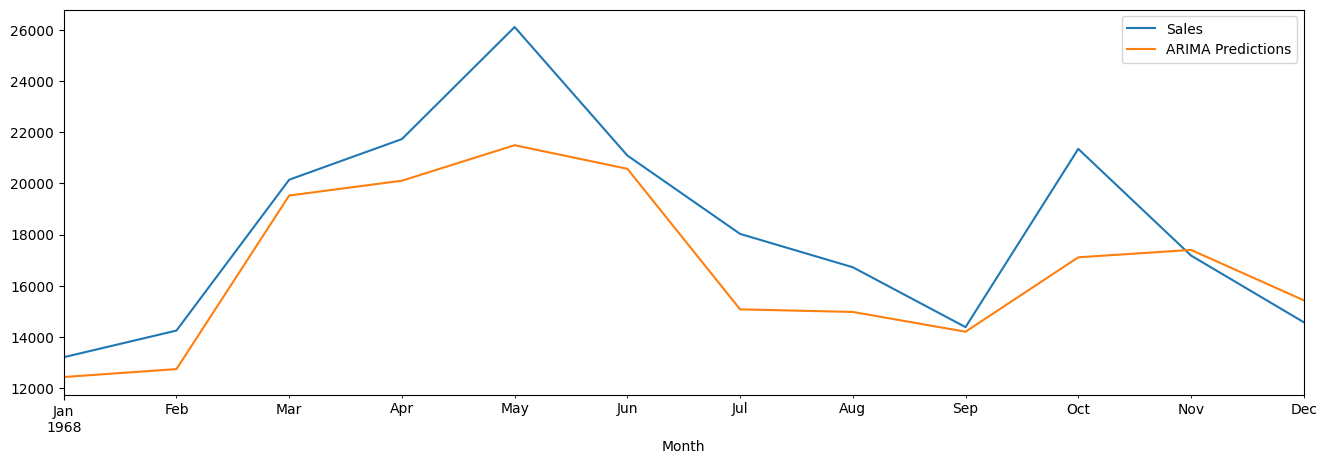

In [32]:
test_data['Sales'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [33]:
arima_rmse_error = rmse(test_data['Sales'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Sales'], arima_pred)
mean_value = df['Sales'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 4821591.227638782
RMSE Error: 2195.8122022702173
Mean: 14595.111111111111


In [34]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

rnn

In [35]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [36]:
n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [37]:
#rnn_model = Sequential()
#rnn_model.add(SimpleRNN(100, activation='relu', input_shape=(n_input, n_features)))
#rnn_model.add(Dense(1))

rnn_model = tf.keras.Sequential([
    #tf.keras.Input(shape=(n_input, n_features)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                           strides=1, padding="causal",
                           activation="relu",
                           input_shape=[n_input, n_features]),
    tf.keras.layers.LSTM(150, return_sequences=True),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 12, 128)           512       
                                                                 
 lstm_2 (LSTM)               (None, 12, 150)           167400    
                                                                 
 lstm_3 (LSTM)               (None, 50)                40200     
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 210,713
Trainable params: 210,713
Non-trainable params: 0
_________________________________________________________________


In [38]:
rnn_model.fit_generator(generator, epochs=25)

Epoch 1/25
84/84 [==============================] - 2s 7ms/step - loss: 0.0614
Epoch 2/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0455
Epoch 3/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0506
Epoch 4/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0282
Epoch 5/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0171
Epoch 6/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0143
Epoch 7/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0149
Epoch 8/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0135
Epoch 9/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0143
Epoch 10/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0109
Epoch 11/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0165
Epoch 12/25
84/84 [==============================] - 1s 7ms/step - loss: 0.0140
Epoch 13/25
84/84 [==============================

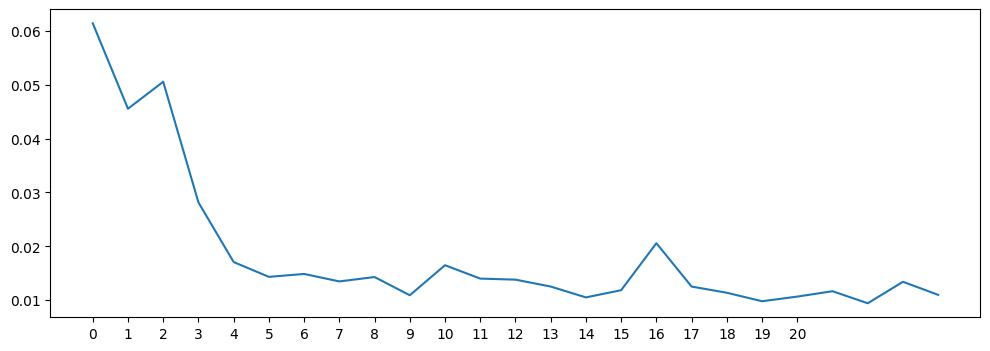

In [39]:
losses_rnn = rnn_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_rnn)),losses_rnn);

In [40]:
RNN_Predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    rnn_pred = rnn_model.predict(current_batch)[0]
    RNN_Predictions_scaled.append(rnn_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[rnn_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.35958516]
 [0.32625722]
 [0.83276616]
 [0.76292335]
 [1.        ]
 [0.89375034]
 [0.46734727]
 [0.42489062]
 [0.43374926]
 [0.62761303]
 [0.56992384]
 [0.43996111]]
shape is  (12, 1)
current batch
[[[0.35958516]
  [0.32625722]
  [0.83276616]
  [0.76292335]
  [1.        ]
  [0.89375034]
  [0.46734727]
  [0.42489062]
  [0.43374926]
  [0.62761303]
  [0.56992384]
  [0.43996111]]]
shape is  (1, 12, 1)
1/1 [==============================] - 0s 487ms/step
current_batch now
 [[[0.32625722]
  [0.83276616]
  [0.76292335]
  [1.        ]
  [0.89375034]
  [0.46734727]
  [0.42489062]
  [0.43374926]
  [0.62761303]
  [0.56992384]
  [0.43996111]
  [0.40671685]]]
current_batch shape
 (1, 12, 1)
1/1 [==============================] - 0s 21ms/step
current_batch now
 [[[0.83276616]
  [0.76292335]
  [1.        ]
  [0.89375034]
  [0.46734727]
  [0.42489062]
  [0.43374926]
  [0.62761303]
  [0.56992384]
  [0.43996111]
  [0.40671685]
  [0.4597542 ]]]
current_batch shape
 (1, 12, 1)
1/1 [==============

In [41]:
RNN_Predictions_scaled

[array([0.40671685], dtype=float32),
 array([0.4597542], dtype=float32),
 array([0.854931], dtype=float32),
 array([0.8605896], dtype=float32),
 array([0.9303014], dtype=float32),
 array([0.91604495], dtype=float32),
 array([0.5075374], dtype=float32),
 array([0.46271068], dtype=float32),
 array([0.47931024], dtype=float32),
 array([0.66215426], dtype=float32),
 array([0.5761392], dtype=float32),
 array([0.4531149], dtype=float32)]

In [42]:
RNN_Predictions = scaler.inverse_transform(RNN_Predictions_scaled)

In [43]:
global_test_data['RNN_Predictions'] = RNN_Predictions

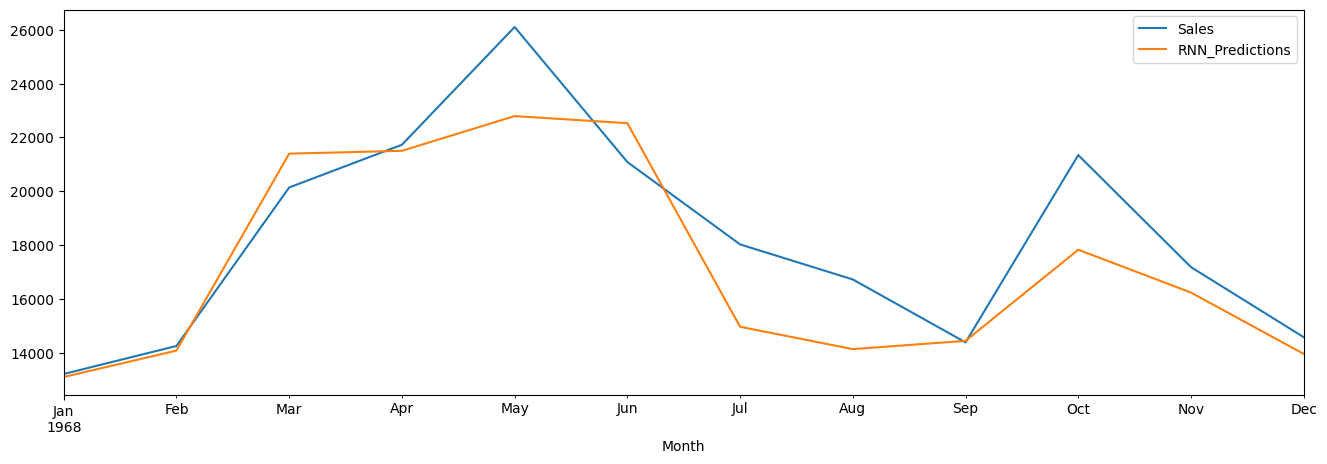

In [44]:
global_test_data['Sales'].plot(figsize = (16,5), legend=True)
global_test_data['RNN_Predictions'].plot(legend = True);

In [45]:
rnn_rmse_error = rmse(global_test_data['Sales'], global_test_data["RNN_Predictions"])
rnn_mse_error = rnn_rmse_error**2
rnn_mae_error = mean_absolute_error(global_test_data['Sales'], global_test_data["RNN_Predictions"])
mean_value = df['Sales'].mean()

print(f'MSE Error: {rnn_mse_error}\nRMSE Error: {rnn_rmse_error}\nMean: {mean_value}')

MSE Error: 3699986.450515853
RMSE Error: 1923.5348841432153
Mean: 14595.111111111111


In [46]:
rmse_errors = [arima_rmse_error, rnn_rmse_error]
mse_errors = [arima_mse_error, rnn_mse_error]
mae_errors = [arima_mae_error, rnn_mae_error]

In [51]:
errors = pd.DataFrame({"Models" : ["ARIMA", "RNN"],"RMSE Error" : rmse_errors, "MSE Error" : mse_errors,"MAE Error": mae_errors})

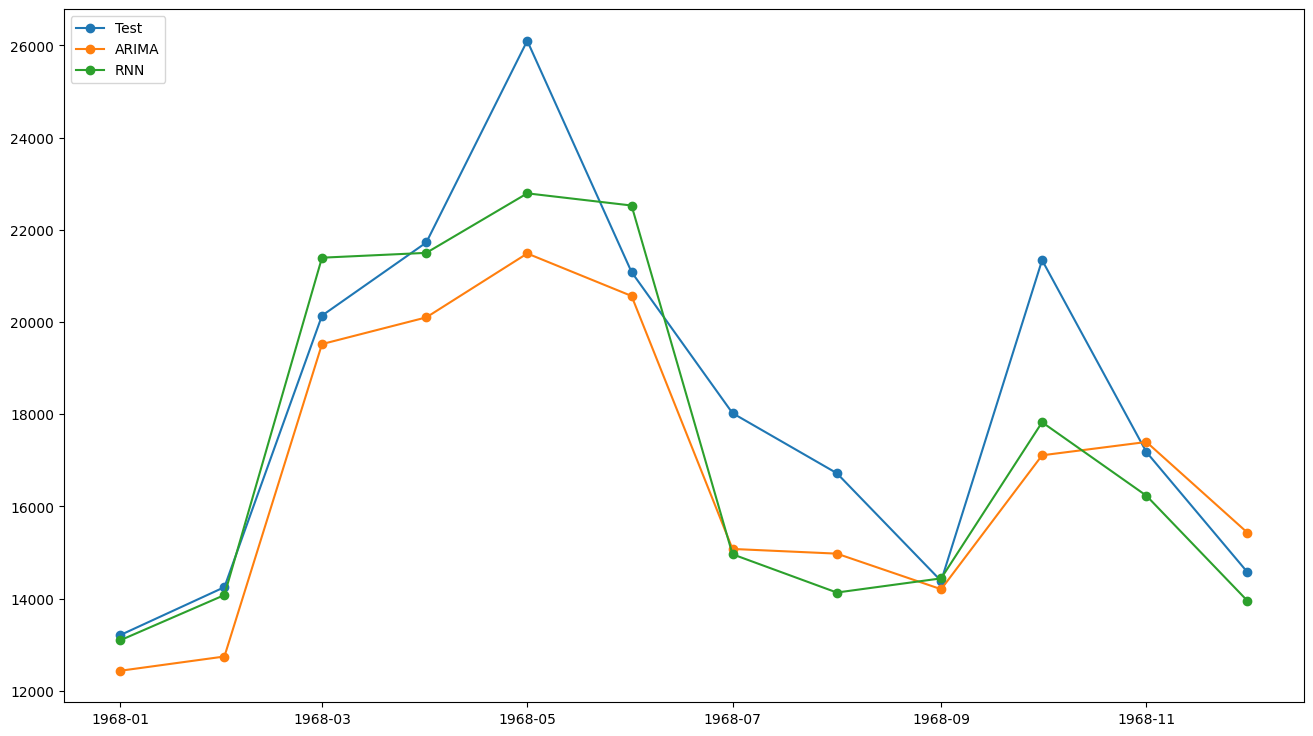

In [48]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Sales"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["RNN_Predictions"], linestyle="-")
plt.legend(["Test", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [52]:
print(f"Mean: {global_test_data['Sales'].mean()}")
errors

Mean: 18228.166666666668


,Models,RMSE Error,MSE Error,MAE Error
0,ARIMA,2195.812202,4.821591e+06,1652.070990
1,RNN,1923.534884,3.699986e+06,1441.879786


In [50]:
global_test_data

,Sales,ARIMA_Predictions,RNN_Predictions
Month,,,
1968-01-01,13210,12437.592218,13097.549107
1968-02-01,14251,12747.005207,14079.429482
1968-03-01,20139,19521.571206,21395.337546
1968-04-01,21725,20100.873162,21500.095699
1968-05-01,26099,21486.297581,22790.670334
1968-06-01,21084,20565.534053,22526.740168
1968-07-01,18024,15079.413175,14964.040341
1968-08-01,16722,14977.806920,14134.162793
1968-09-01,14385,14205.955763,14441.470553
